In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('/content/titanic_dataset .csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.shape

(891, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
# handling missing values

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


#drop columns with many missing values

df.drop(['Cabin'], axis=1, inplace=True)



In [36]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [37]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


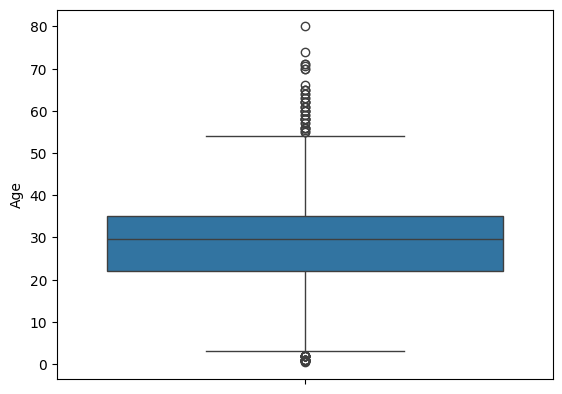

In [38]:
# outleir detection

sns.boxplot(df['Age'])
plt.show()


In [39]:
# removing outliers

def remove_outliers(df, column):
  Q1 = df['Age'].quantile(0.25)
  Q3 = df['Age'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

df = remove_outliers(df, 'Age')
#df = remove_outliers(df, 'Fare')


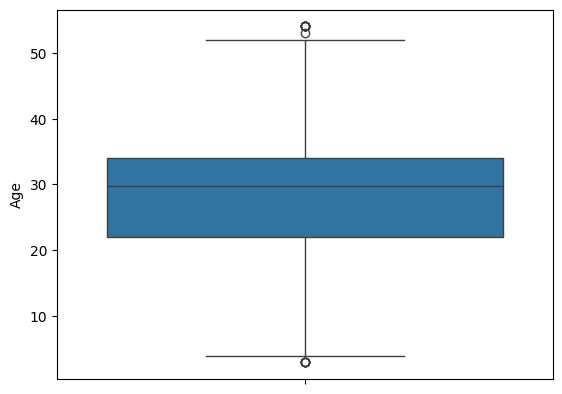

In [40]:
sns.boxplot(df['Age'])
plt.show()

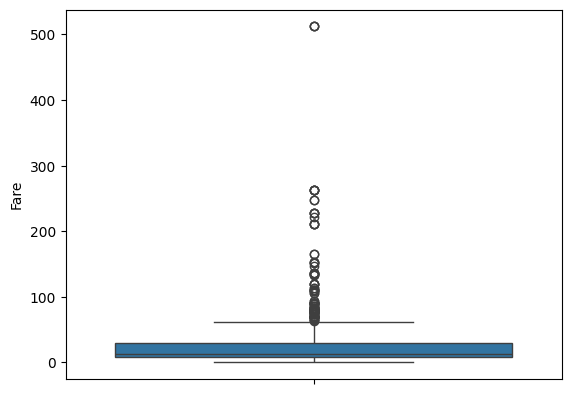

In [41]:
# fare

sns.boxplot(df['Fare'])
plt.show()

In [42]:

df = remove_outliers(df, 'Fare')


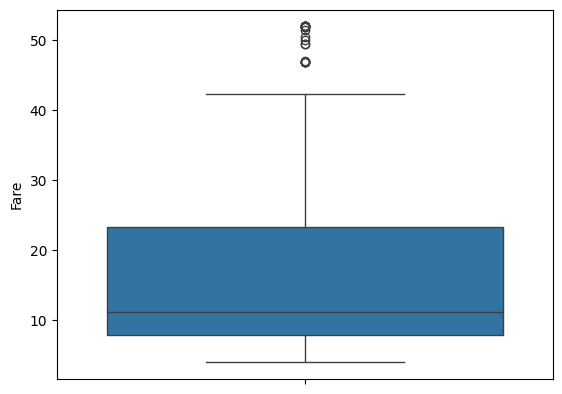

In [43]:
sns.boxplot(df['Fare'])
plt.show()

In [44]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [45]:
# Encode categorical variables
#drop
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'])


In [46]:
df.dtypes

,0
Survived,int64
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Sex_female,bool
Sex_male,bool
Embarked_C,bool
Embarked_Q,bool


In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
5,0,3,29.699118,0,0,8.4583,False,True,False,True,False
6,0,1,54.000000,0,0,51.8625,False,True,False,False,True


In [48]:
#convert bool into int

df['Sex_female'] = df['Sex_female'].astype(int)
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)




In [49]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1


In [50]:
df.dtypes

,0
Survived,int64
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Sex_female,int64
Sex_male,int64
Embarked_C,int64
Embarked_Q,int64


In [51]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_female,0
Sex_male,0
Embarked_C,0
Embarked_Q,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    674 non-null    int64  
 1   Pclass      674 non-null    int64  
 2   Age         674 non-null    float64
 3   SibSp       674 non-null    int64  
 4   Parch       674 non-null    int64  
 5   Fare        674 non-null    float64
 6   Sex_female  674 non-null    int64  
 7   Sex_male    674 non-null    int64  
 8   Embarked_C  674 non-null    int64  
 9   Embarked_Q  674 non-null    int64  
 10  Embarked_S  674 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 63.2 KB


In [77]:
#standerdization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [78]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.614338,1,0,-0.812409,0,1,0,0,1
2,1,3,-0.213974,0,0,-0.749083,1,0,0,0,1
4,0,3,0.686847,0,0,-0.737356,0,1,0,0,1
5,0,3,0.156276,0,0,-0.699051,0,1,0,1,0
6,0,1,2.588580,0,0,3.372954,0,1,0,0,1


split the dataset

In [63]:
from sklearn.model_selection import train_test_split


# Split the dataset
X = df.drop('Survived', axis=1)
y = df['Survived']




creating knn and svm models

In [64]:
from sklearn.neighbors import KNeighborsClassifier
# Create kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
from sklearn.svm import SVC
# Create SVM model
svm = SVC()
svm.fit(X_train, y_train)


SVC()

kfold and Stratifiedkfold

In [76]:

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold



# k-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
knn_kf_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
svm_kf_scores = cross_val_score(svm, X, y, cv=kf, scoring='accuracy')

# Stratified k-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
knn_skf_scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
svm_skf_scores = cross_val_score(svm, X, y, cv=skf, scoring='accuracy')



knn_kf_scores, svm_kf_scores, knn_skf_scores, svm_skf_scores

(array([0.77941176, 0.76470588, 0.85294118, 0.76470588, 0.7761194 ,
        0.76119403, 0.86567164, 0.74626866, 0.80597015, 0.79104478]),
 array([0.80882353, 0.76470588, 0.82352941, 0.75      , 0.80597015,
        0.8358209 , 0.88059701, 0.79104478, 0.8358209 , 0.79104478]),
 array([0.77941176, 0.85294118, 0.72058824, 0.77941176, 0.74626866,
        0.86567164, 0.79104478, 0.80597015, 0.73134328, 0.74626866]),
 array([0.77941176, 0.86764706, 0.80882353, 0.80882353, 0.79104478,
        0.82089552, 0.8358209 , 0.86567164, 0.71641791, 0.80597015]))

calculating average accuracy scores

In [79]:

knn_kf_avg = knn_kf_scores.mean()
svm_kf_avg = svm_kf_scores.mean()
knn_skf_avg = knn_skf_scores.mean()
svm_skf_avg = svm_skf_scores.mean()

knn_kf_avg, svm_kf_avg, knn_skf_avg, svm_skf_avg


(0.790803336259877, 0.8087357330992099, 0.7818920105355576, 0.8100526777875329)